<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#practical_plan">Practical overview</a></li>
        <li><a href="#data_description">Data description</a></li>
        <li><a href="#reading_data">Preparation: importing packages and reading data </a></li>
        <li><a href="#building_tree">Task 1: Decision Tree Classification </a></li>
        <li><a href="#visualisation">Visualisation  </a></li>
        <li><a href="#play">Task 2: Play with Parameters </a></li>
        <li><a href="#reflection">Reflection </a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="practical_plan">Practical overview</h2>

- In this practical you will be implementing a decision tree classifier, visualising its performance and plotting the resulting tree.

- We will use the dataset septic_shock.csv, which you are familiar with (if you have taken the Intorduction to Health Informatics module). The data contains 11 features and 2 outcomes (hospital mortality and length of hospital stay) for a cohort of patients diagnosed with septic shock. 

- __Septic shock__ (namely, infection throughout the body) is a potentially fatal medical condition that occurs when sepsis, which is organ injury or damage in response to infection, leads to dangerously low blood pressure and abnormalities in cellular metabolism. The Third International Consensus Definitions for Sepsis and Septic Shock (Sepsis-3) defines septic shock as a subset of sepsis in which particularly profound circulatory, cellular, and metabolic abnormalities are associated with a greater risk of mortality than with sepsis alone. Septic shock is associated with hospital mortality rates greater than 40%.

<h2 id="data_description">Data description - get familiar with the dataset</h2>

The dataset contains the following features (columns): 
- __Gender:__ 0 (male), 1 (female)
- __los:__ Length of hospital stay in days
- __hospital mortality:__ death in hospital (0/1 -> no/yes)
- __comorbidity_elixhauser:__ the elixhauser index of co-morbidity, aims to develop a comprehensive set of comorbidity measures that were associated with hospital length of stay, hospital charges, and in-hospital mortality. Range: -19 (less likely for in-hospital death) to 89 (more likely for in-hospital death). 
- The SOFA (sequential organ failure assessment) score: measures the extent of a person's organ function or rate of failure. Range: 0 (no organ failure) to 24 (complete organ failure). Wikipedia page: https://en.wikipedia.org/wiki/SOFA_score. The SOFA score comprises 6 components,each measuring the dysfunction in one aspect of the individual. , The total SOFA score for a person is the sum of all of the SOFA subscores for the individual: 
    - Respiration SOFA subscore: range 0-4
    - Coagulation SOFA subscore: range 0-4
    - Liver SOFA subscore: range 0-4
    - Renal SOFA subscore: range 0-4
    - Cardiovascular SOFA subscore: range 0-4
    - Central Nervous System (CNS) SOFA subscore: range 0-4


- Remember: Scikit-learn is organised in sublibraries (or modules):
    - The sklearn.neighbors module implements the k-nearest neighbors algorithm
    - The sklearn.metrics module contains all performance estimators and metrics

<h2 id="reading_data">Preparation: importing packages and reading data</h2>

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_to_file ="/home/changhyun/workspace/ml_bioinfo_hi/topic2/septic_shock.csv"
septic_shock_data = pd.read_csv(path_to_file, encoding='utf-8')

In [4]:
septic_shock_data.head()

,age,gender,los,hospital_mortality,comorbidity_elixhauser,sofa,respiration,coagulation,liver,cardio,cns,renal
0,28,1,6.083333,0,4,2,0,0,1,0,0,1
1,79,0,7.750000,0,3,2,0,0,0,2,0,0
2,42,1,17.041667,0,11,2,0,0,0,2,0,0
3,54,1,8.125000,0,0,2,0,1,0,0,1,0
4,66,0,12.000000,0,4,2,0,0,0,2,0,0


<h2 id="building_tree">Task 1: Decision Tree Classification</h2>

We will build perform a supervised Learning task using a Decision Tree classifier to predict mortality from the SOFA score:

- We will implment the DT classifier using the following features:
    - Age (column 0)
    - Gender (column 1)
    - comorbidity_elixhauser (column 4)
    - Overall sofa (column 5)
- The classification outcome will be hospital_mortality.

- Instructions for training and evaluation: 
    - Split the data into training and testing sets where: 
       - 2/3 of the samples will be used for training
       - 1/3 of the samples will be used for testing 
    - Evaluate the algorithm performance:
        - Compare the original outcomes in the test set with the outcomes predicted by the algorithm.
        - Use accuracy, sensitivity, specificity, etc....
        - Remember: each metric needs to be imported separately (i.e. add to: from sklearn.metrics import accuracy_score, confusion_matrix above)
        - Plot the confusion matrix
    
- Implementation Details: 
    - Define X and y as subsets of the dataframe septic_shock_data
    - Use train_test_split to split the data into training and testing sets as before. 
    - You can create a decision tree classifier using the standard methods in scikit learn by importing the DecisionTreeClassifier class: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    - Use fit and predict to train & prdict as before. 
    - Once the model has been trained, visualise its performance using: 
        - Classification report
        - Confusion Matrix
    - Call the classifier: dtmodel

Classification report
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1387
           1       0.78      0.50      0.61       796

    accuracy                           0.77      2183
   macro avg       0.77      0.71      0.72      2183
weighted avg       0.77      0.77      0.75      2183

Accuracy score
0.7677508016491067
[[1276  111]
 [ 396  400]]


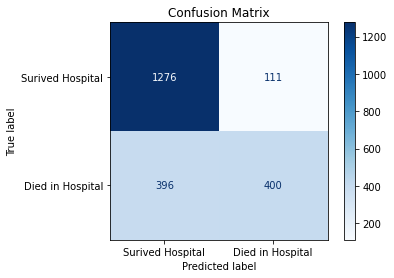

In [29]:
##Your Solution here ##
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1000)

X = septic_shock_data[['age','gender','comorbidity_elixhauser', 'sofa']]
y = septic_shock_data[['hospital_mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Classification report')
print(classification_report(y_test, y_pred))

print('Accuracy score')
print(accuracy_score(y_true=y_test, y_pred=y_pred))

class_names =["Surived Hospital", "Died in Hospital"]

disp = ConfusionMatrixDisplay.from_estimator(dt, 
                                             X_test, 
                                             y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

plt.show()

<h2 id="visualisation">Visualisation</h2>

#### Once you're done with creating the classifier: 

- Remember: DTs are readily interpretable. What this means is that we can view the actual decision tree produced by our model by running the following block of code:
            tree.plot_tree(dtmodel) 
            



[Text(0.6666666666666666, 0.875, 'X[2] <= 16.5\ngini = 0.469\nsamples = 4430\nvalue = [2765, 1665]'),
 Text(0.5, 0.625, 'X[3] <= 8.5\ngini = 0.372\nsamples = 3373\nvalue = [2541, 832]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 5.5\ngini = 0.255\nsamples = 2256\nvalue = [1918, 338]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.184\nsamples = 1074\nvalue = [964, 110]'),
 Text(0.5, 0.125, 'gini = 0.311\nsamples = 1182\nvalue = [954, 228]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.493\nsamples = 1117\nvalue = [623, 494]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.334\nsamples = 1057\nvalue = [224, 833]')]

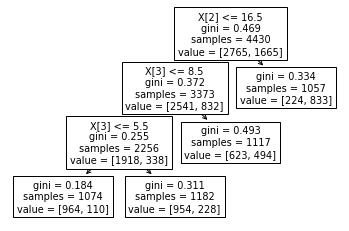

In [31]:
tree.plot_tree(dt)

- However, the decision tree plotted using the plot_tree call isn't very reader-friendly (yet). 
- Once you've done with creating the model, you can run the following code snippet to create a more readable tree: 

        fn=['age','gender','comorbidity_elixhauser','sofa']
        cn=['No', 'Yes']

        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
        tree.plot_tree(dtmodel,
               feature_names = fn, 
               class_names=cn,
               filled = True);
        fig.savefig('imagename.png')

- You can refer to the scikitlearn user guide: https://scikit-learn.org/stable/user_guide.html

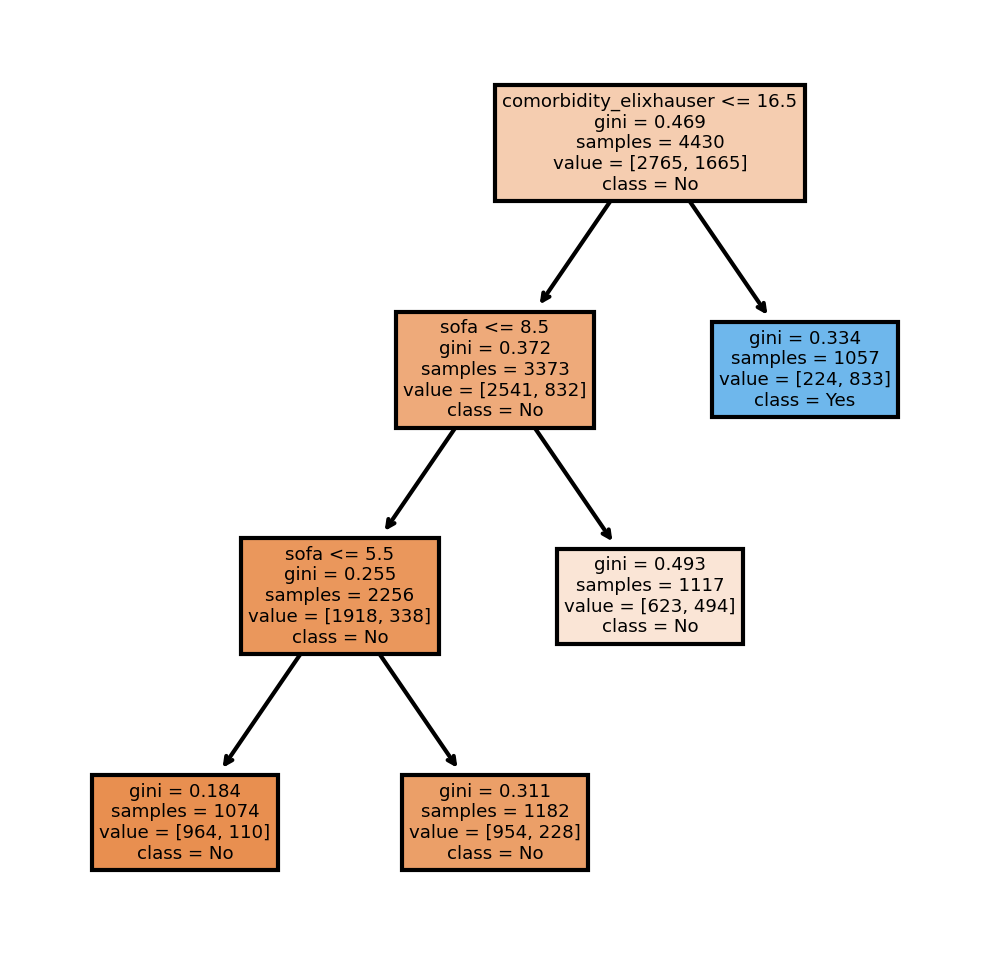

In [33]:
fn=['age','gender','comorbidity_elixhauser','sofa']
cn=['No', 'Yes']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

- Apart from entropy, there are a few other measures of homogeneity used in machine learning algorithms.
- The python implementation of decision trees uses the 'Gini index' instead of entropy for splitting decisions. 
- The 'gini' index is used by decision trees to decide the next split. 
- Both entropy and gini assess how homogenious the groups resulting from a split are. More can be found in the following Towards Data Science articles:

- How Decision Trees Make Decisions: https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

- Gini vs Entropy for assessing information https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

- Parameter tuning in Decision trees https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680



<h2 id="play">Task 2: Playing with Parameters</h2>

- Now, let's change some of the parameters of our DT and examine the effect on the performance and resulting tree. 
- Let's change: 
    - The minimum number of samples per leaf
    - Maximum tree depth
    - The split criterion (from gini to entropy). 
- Use the same instructions for training and evaluation as in the previous task. 
- Plot the confusion matrix to obtain an idea of the tree's performance. 
- Plot the tree as in before to visualise your tree. 
- The scikit page for DTs are provided here for your reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



Classification report
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1387
           1       0.83      0.57      0.68       796

    accuracy                           0.80      2183
   macro avg       0.81      0.75      0.77      2183
weighted avg       0.81      0.80      0.79      2183

Accuracy score
0.8007329363261567
[[1295   92]
 [ 343  453]]


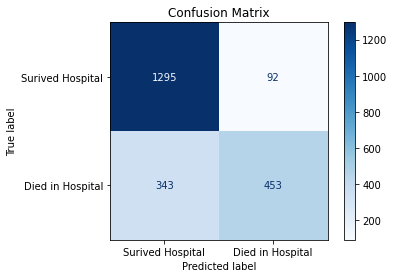

In [34]:
##Your Solution here ##

dt = DecisionTreeClassifier(max_depth=100,min_samples_leaf=100, criterion='entropy')

X = septic_shock_data[['age','gender','comorbidity_elixhauser', 'sofa']]
y = septic_shock_data[['hospital_mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Classification report')
print(classification_report(y_test, y_pred))

print('Accuracy score')
print(accuracy_score(y_true=y_test, y_pred=y_pred))

class_names =["Surived Hospital", "Died in Hospital"]

disp = ConfusionMatrixDisplay.from_estimator(dt, 
                                             X_test, 
                                             y_test, 
                                             display_labels=class_names, 
                                             cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

plt.show()

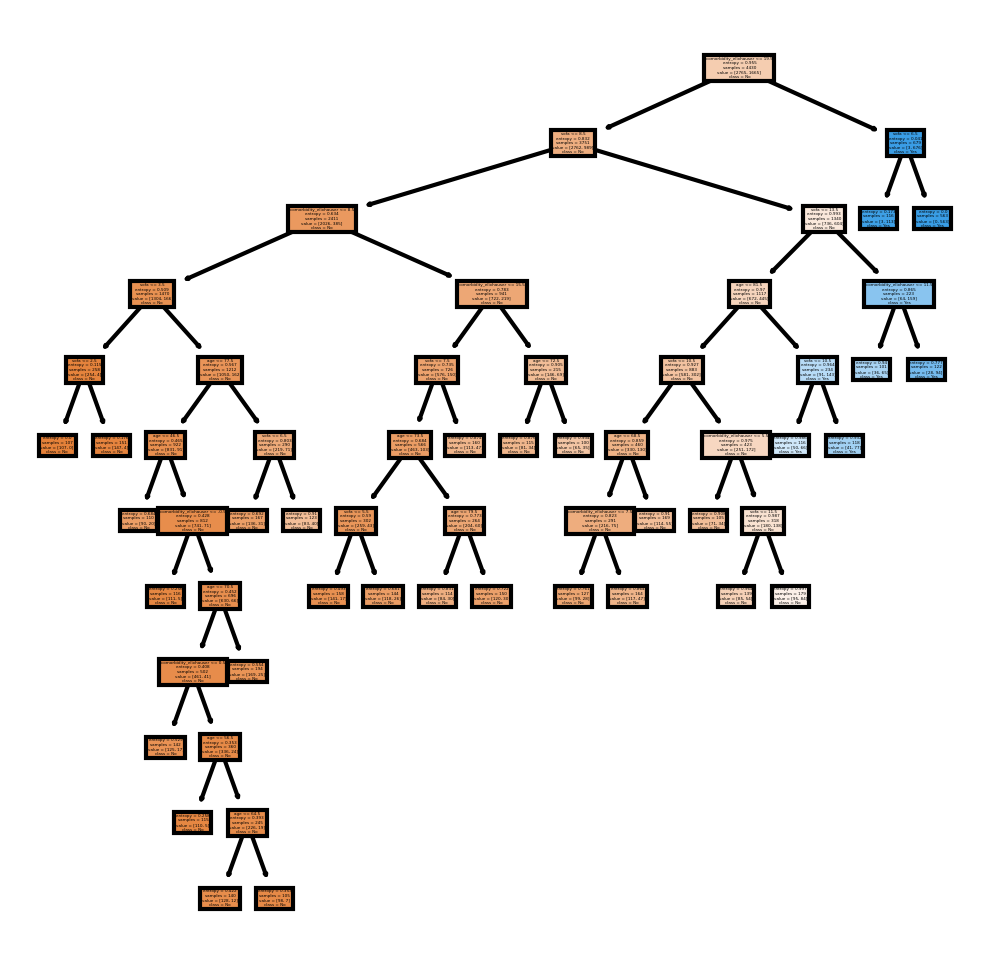

In [36]:
fn=['age','gender','comorbidity_elixhauser','sofa']
cn=['No', 'Yes']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

<h2 id="reflection">Reflection</h2>

- What's the effect of changing the maximum tree depth
- What's the effect of changing the minimum number of samples in the leaf?
- Is there a difference in the performance when using entropy as opposed to gini?


#### Your answers here
